In [2]:
import numpy as np
from vectorize import load_json, save_json,vectorize
from pullDescriptions import getDesc
import scipy.cluster.hierarchy as hc
from sklearn.manifold import MDS,TSNE,Isomap
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import ConfusionMatrixDisplay
from cluster_comparison import compare
import nltk
from sklearn.metrics import f1_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN,KMeans
from scipy.signal import savgol_filter
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import cdist
from sklearn_extra.cluster import KMedoids
from kneed import DataGenerator, KneeLocator
from unionFind import UnionFind
%cd ./NCDBasedChecker
from NCDBasedChecker import utils
from NCDClusterer import NCDClusterer,Clusterer
%cd ..

C:\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\vikram14\Desktop\Research\IntelliDiff\NCDBasedChecker
c:\Users\vikram14\Desktop\Research\IntelliDiff


### Compute Similarity Matrix using Normalized Compression Distance

In [3]:
file_path='./comp116/116Q2Solns.json'

In [4]:
data = load_json(file_path)
manuals= load_json('./comp116/116Q2Solns_Manual_Labeled_new.json')
manuals =[{'studentID':k, 'code':v['solution'], 'label_order1': v['label_order1'], 'description':""}for k,v in manuals.items()]
methods = [{'studentID':k, 'code':v['solution'], 'label':"", 'description':""}for k,v in data.items()]


In [5]:
sub_arr= utils.methodArray_to_SubmissionArray(methods,[(methods[i]['studentID'],i) for i in range(len(methods))] ,mode='tok',lang='python',obf_var=True)
clusterer = NCDClusterer(None, sub_arr)
#res =clusterer.checkBlockSimilarity(append_ncd=True)
#res=utils.sigmoid(1-clusterer.checkBlockSimilarity(k=3, b=256, s=128))
#res=utils.sigmoid(1-clusterer.checkShuffleSimilarity(b=128, s=64))
#res = clusterer.checkShuffleSimilarity(b=256, s=128)
res = clusterer.checkShuffleSimilarity(b=256, s=128,adaptive_windows=True)
clusterer1 = Clusterer(res)
norm_res =(res - np.min(res))/(np.max(res)-np.min(res))

Pre-processing done!
calculating row: 0

calculating row: 1

calculating row: 2

calculating row: 3

calculating row: 4

calculating row: 5

calculating row: 6

calculating row: 7

calculating row: 8

calculating row: 9

calculating row: 10

calculating row: 11

calculating row: 12

calculating row: 13

calculating row: 14

calculating row: 15

calculating row: 16

calculating row: 17

calculating row: 18

calculating row: 19

calculating row: 20

calculating row: 21

calculating row: 22

calculating row: 23

calculating row: 24

calculating row: 25

calculating row: 26

calculating row: 27

calculating row: 28

calculating row: 29

calculating row: 30

calculating row: 31

calculating row: 32

calculating row: 33

calculating row: 34

calculating row: 35

calculating row: 36

calculating row: 37

calculating row: 38

calculating row: 39

calculating row: 40

calculating row: 41

calculating row: 42

calculating row: 43

calculating row: 44

calculating row: 45

calculating row: 46

ca

### Visualize Vectors and Manual labels

In [6]:
y=np.array([manual['label_order1'] for manual in manuals])

In [48]:
ncd_vectors_2dim = MDS(n_components= 2, dissimilarity='precomputed',max_iter=10000).fit_transform(res)

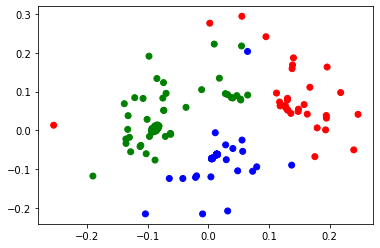

In [49]:
cmap={'1':'red','2':'blue','3':'green','4':'yellow'}
fig, ax = plt.subplots()
ax.scatter(ncd_vectors_2dim[:,0],ncd_vectors_2dim[:,1], c=[cmap[i] for i in y])

for i in range(ncd_vectors_2dim.shape[0]):
    if(y[i]=='4'):
        ax.annotate(methods[i]['studentID'][7:], (ncd_vectors_2dim[i,0],ncd_vectors_2dim[i,1]))

### SVM classification

In [9]:
## Vectorize similarity matrix
ncd_vectors = MDS(n_components= 4, dissimilarity='precomputed').fit_transform((res - np.min(res))/(np.max(res)-np.min(res)))
#ncd_vectors = np.load('./comp116/numpy_vectors/ncd_vectors.npy')

In [10]:
X_train,X_test, y_train, y_test = train_test_split(ncd_vectors,y,test_size=0.30,stratify=y, random_state=31)

In [11]:
svc = SVC(kernel='linear')

In [12]:
fitted_model = svc.fit(X_train,y_train)
predicted_y= fitted_model.predict(ncd_vectors)

#### Confusion Matrix for Test Set

accuracy on test set: 1.0
f1 score : 1.0


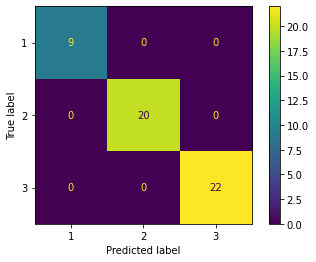

In [13]:
print(f'accuracy on test set: {fitted_model.score(X_test,y_test)}')
print(f"f1 score : {f1_score(y_test, fitted_model.predict(X_test),average='macro')}")
cfd=ConfusionMatrixDisplay.from_estimator(fitted_model,X_test,y_test)

#### Confusion Matrix for All Submissions

accuracy on all submissions: 0.9880952380952381
f1 score : 0.9873853297518557


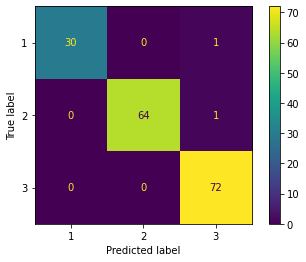

In [14]:
print(f'accuracy on all submissions: {fitted_model.score(ncd_vectors,y)}')
print(f"f1 score : {f1_score(y, predicted_y,average='macro')}")
cfd=ConfusionMatrixDisplay.from_estimator(fitted_model,ncd_vectors,y)

#### Misclassified

In [15]:
for idx,v in enumerate(y):
    if(v!=predicted_y[idx]):
        print(predicted_y[idx],v)
        print(methods[idx])
        

3 1
{'studentID': 'student145', 'code': "# cell 6 of 14\n\ndef word_count(temp_text):\n    '''Return the number of words'''\n    num_words=0\n    for words in temp_text.split() :\n        if words != ['.','!','?',':',';'] and  words != ' ' :\n            num_words = num_words + words.count(words)\n        \n    # num_words: the number of words in the string temp_text\n    return num_words", 'label': '', 'description': ''}
3 2
{'studentID': 'student073', 'code': "# cell 6 of 14\n\ndef word_count(temp_text):\n    '''Return the number of words'''\n    num_words=0\n    for word in temp_text.split():\n        for word in [' ']:\n            num_words=num_words+word.count(word)\n    # num_words: the number of words in the string temp_text\n    return num_words", 'label': '', 'description': ''}


### Unsupervised Hierarchical Clustering

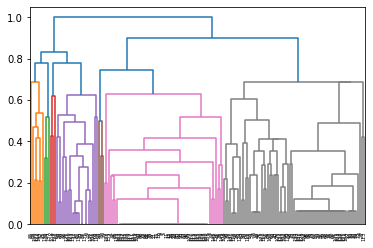

In [111]:
linkage=clusterer.cluster(clusteringLikage='complete', normalize=True)
_=utils.plot_dendrogram(linkage,0,None)

In [112]:
labels=hc.fcluster(linkage,t=3,criterion='maxclust')
# labels = clusterer1.dbscan(0.15, 8).labels_
# np.unique(labels)

In [1]:
# import matplotlib.pyplot as plt
# #plt.hist(np.mean(res,axis=1))
# means = np.mean(res,axis=1)
# for idx,v in enumerate(means>0.22) :
#     if(v==1):
#         print(methods[idx]['studentID'])
#         print(methods[idx]['code'])

In [19]:
# monocrit = np.zeros((linkage.shape[0],))
# monocrit[[-1,-2,-3,-4,-5,-6]]=1

# labels= hc.fcluster(linkage,t=0,criterion='monocrit',monocrit=monocrit)

In [113]:
clusters={i:[] for i in labels} #if i>0}
sims={i:[] for i in labels}
for i,m in enumerate(methods):
    # if(labels[i]<=0):
    #     continue
    clusters[labels[i]].append((m['code'],m['description'],m['studentID']))
    sims[labels[i]].append(i)



for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(f'{m[2]}')
        print('-'+'\n-'.join(nltk.sent_tokenize(m[1])))
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 1 SIZE : 34

student085
-
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    num_words = 1
    for x in temp_text: 
        if x == ' ':
            num_words += 1
    # num_words: the number of words in the string temp_text
    return num_words

 ######
student033
-
# cell 6 of 14

def word_count(temp_text):
    num_words = ""
    for words in temp_text:
        if words.lower() == "." or words.lower() == "!" or words.lower() == ";" or words.lower() == ":" or words.lower() == "?" or words.lower() == " ":
            num_words += words
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    return len(num_words)

 ######
student175
-
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1
    for i in temp_text:
        if i == ' ':
            num_words += 1
    return num_words

 ######
student145

#### Unsupervised Clustering Comparison to Manual Labels

*********************************

iou:{('1', '1'): 0.9117647058823529, ('2', '2'): 0.9393939393939394, ('3', '3'): 0.9324324324324325}


accuracy:{('1', '1'): 1.0, ('2', '2'): 0.9538461538461539, ('3', '3'): 0.9583333333333334}

rand score: 0.9506700883946393
adjusted rand score: 0.8929526395696517
normalized mutual information: 0.8446303965824207
fowlkes mallows score: 0.9315326532342422
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



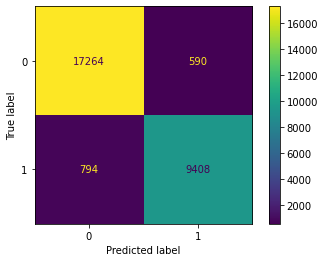

In [22]:
file_path_manual= './comp116/116Q2Solns_Manual_Labeled_new.json'
file_path_ncd= './comp116/116Q2Soln-PlagDet-3clust.json' 

cfd=compare(file_path_ncd, file_path_manual).plot()

#### K-MEANS

In [31]:
manuals_rare= load_json('./comp116/116Q2Solns_Manual_Labeled_With_Rare_new.json')
manuals_rare =[{'studentID':k, 'code':v['solution'], 'label_order1': v['label_order1'], 'description':""}for k,v in manuals_rare.items()]

In [32]:
mds_vectors_2dim = MDS(n_components=24,dissimilarity='precomputed').fit_transform(norm_res)

In [33]:
kmeans = KMeans(n_clusters=4,max_iter=10000)
kmeans.fit(mds_vectors_2dim)
# kmedoids =KMedoids(n_clusters=4,max_iter=10000,method='pam')
# kmedoids.fit(mds_vectors_2dim)
# labels_med = kmedoids.labels_

KMeans(max_iter=10000, n_clusters=4)

In [34]:
labels_med= kmeans.labels_

In [35]:
clusters={i:[] for i in labels_med} #if i>0}
sims={i:[] for i in labels_med}
for i,m in enumerate(methods):
    # if(labels[i]<=0):
    #     continue
    clusters[labels_med[i]].append((m['code'],m['description'],m['studentID']))
    sims[labels_med[i]].append(i)



for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(f'{m[2]}')
        print('-'+'\n-'.join(nltk.sent_tokenize(m[1])))
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 2 SIZE : 26

student085
-
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    num_words = 1
    for x in temp_text: 
        if x == ' ':
            num_words += 1
    # num_words: the number of words in the string temp_text
    return num_words

 ######
student033
-
# cell 6 of 14

def word_count(temp_text):
    num_words = ""
    for words in temp_text:
        if words.lower() == "." or words.lower() == "!" or words.lower() == ";" or words.lower() == ":" or words.lower() == "?" or words.lower() == " ":
            num_words += words
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    return len(num_words)

 ######
student175
-
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1
    for i in temp_text:
        if i == ' ':
            num_words += 1
    return num_words

 ######
student106

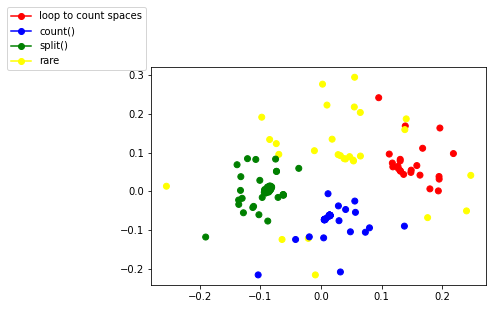

In [50]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
manual_rare_label=[s['label_order1'] for s in manuals_rare]
ax.scatter(ncd_vectors_2dim[:,0],ncd_vectors_2dim[:,1], c=[cmap[i] for i in manual_rare_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'),Line2D([0],[0], marker ='o',color='green'),Line2D([0],[0], marker ='o',color='yellow'))
ax.legend(custom_legend,["loop to count spaces","count()","split()","rare"],bbox_to_anchor =(0,1.3))

# for i in range(ncd_vectors_2dim.shape[0]):
#     if(manual_rare_label[i]=='4'):
#         ax.annotate(methods[i]['studentID'][7:], (ncd_vectors_2dim[i,0],ncd_vectors_2dim[i,1]))

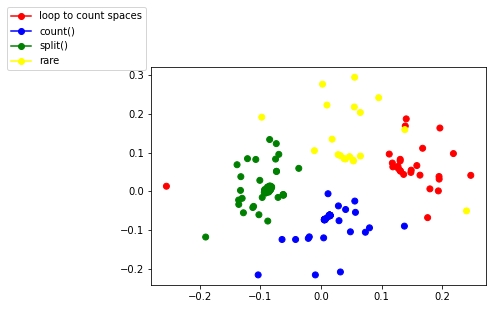

In [52]:
cmap1={'2':'red','1':'blue','3':'green','0':'yellow'}
fig, ax = plt.subplots()
ax.scatter(ncd_vectors_2dim[:,0],ncd_vectors_2dim[:,1], c=[cmap1[str(i)] for i in labels_med])
ax.legend(custom_legend,["loop to count spaces","count()","split()","rare"],bbox_to_anchor =(0,1.3))

# for i in range(ncd_vectors_2dim.shape[0]):
#     if(str(labels_med[i])=='3'):
#         ax.annotate(methods[i]['studentID'][7:], (ncd_vectors_2dim[i,0],ncd_vectors_2dim[i,1]))


0.12636225862931508


34

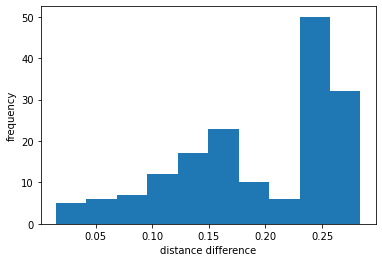

In [53]:
distances=cdist(mds_vectors_2dim,kmeans.cluster_centers_)
sorted_dist=[]
for row in distances:
    temp=np.sort(row)
    sorted_dist.append(temp[1]-temp[0])

plt.hist(sorted_dist)
plt.xlabel('distance difference')
plt.ylabel('frequency')
print(np.percentile(sorted_dist,20))
outliers=np.argwhere(sorted_dist<np.percentile(sorted_dist,20)).squeeze()
len(outliers)

In [58]:
import copy
rev_cmap1= {v:k for k,v in cmap1.items()}
label_med_new = copy.copy(labels_med)
for i in outliers:
    if(cmap1[str(label_med_new[i])]!=cmap[manual_rare_label[i]]):
        print(sorted_dist[i])
        print(cmap1[str(label_med_new[i])],cmap[manual_rare_label[i]])
        print(methods[i]['studentID'])
        print(methods[i]['code'])
        label_med_new[i]= rev_cmap1[cmap[manual_rare_label[i]]]

0.055864160911785254
red yellow
student033
# cell 6 of 14

def word_count(temp_text):
    num_words = ""
    for words in temp_text:
        if words.lower() == "." or words.lower() == "!" or words.lower() == ";" or words.lower() == ":" or words.lower() == "?" or words.lower() == " ":
            num_words += words
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    return len(num_words)
0.043769211113673545
blue yellow
student177
# cell 6 of 14 - TRIAL

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 0
    tokens
        
    return num_words
0.09013821131944433
green yellow
student025
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    for words in temp_text: 
        words = temp_text.split()
        num_words = len(words)
    # num_words: the number of words in the string temp_text
    return num_words
0.11773

*********************************

iou:{('2', '1'): 1.0, ('1', '2'): 0.9838709677419355, ('0', '4'): 0.9285714285714286, ('3', '3'): 0.9824561403508771}


accuracy:{('2', '1'): 1.0, ('1', '2'): 1.0, ('0', '4'): 0.9285714285714286, ('3', '3'): 1.0}

rand score: 0.9878813800969489
adjusted rand score: 0.9704203772983354
normalized mutual information: 0.957095447578887
fowlkes mallows score: 0.9789546944804739
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



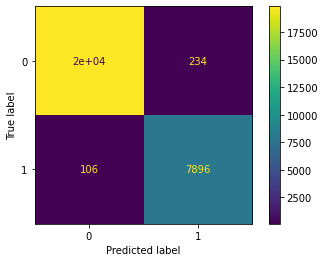

In [60]:
compare('./comp116/116Q2Soln-NCD-KMeans-24dim-1.json', './comp116/116Q2Solns_Manual_Labeled_With_Rare_new.json').plot()

stress for mds of dim 1 = 0.43568384642876185
stress for mds of dim 2 = 0.18803251530514548
stress for mds of dim 3 = 0.12846190643811628
stress for mds of dim 4 = 0.098423787798802
stress for mds of dim 5 = 0.08347690416666047
stress for mds of dim 6 = 0.0730519369129828
stress for mds of dim 7 = 0.0682049458527133
stress for mds of dim 8 = 0.061556732334286254
stress for mds of dim 9 = 0.059176769620288686
stress for mds of dim 10 = 0.058198627042350806
stress for mds of dim 11 = 0.056387915687360325
stress for mds of dim 12 = 0.054607087191183325
stress for mds of dim 13 = 0.05351247987689202
stress for mds of dim 14 = 0.05349391303830999
stress for mds of dim 15 = 0.05297703288028177
stress for mds of dim 16 = 0.05175547910504767
stress for mds of dim 17 = 0.05092906176046997
stress for mds of dim 18 = 0.05146294330788996
stress for mds of dim 19 = 0.05115022144944768
stress for mds of dim 20 = 0.050675825175180704
stress for mds of dim 21 = 0.04999669609557785
stress for mds of di

Text(0.5, 1.0, 'stress vs dimension')

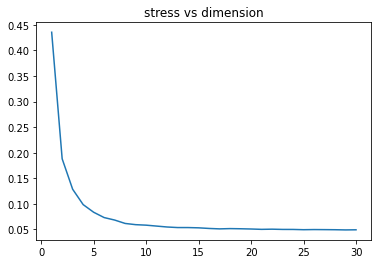

In [35]:
s2= np.sum(np.square(norm_res))
stresses=[]
for i in range(1,31):
    temp=MDS(n_components= i, dissimilarity='precomputed',max_iter=10000).fit(norm_res)

    stress= np.sqrt(np.sum(np.square(norm_res-cdist(temp.embedding_,temp.embedding_)))/s2)
    stresses.append(stress)
    print(f"stress for mds of dim {i} = {stress}")
plt.plot(range(1,31), stresses)
plt.title("stress vs dimension")

### Unique Solutions

In [5]:
unionFind=UnionFind([m['studentID']for m in methods])
for i in range(len(methods)):
    for j in range(i+1,len(methods)):
        if(norm_res[i,j]<=0.21):
            unionFind.union(methods[i]['studentID'], methods[j]['studentID'])
             
unique_solns = {}
for solution in methods:
    key = unionFind.find(solution['studentID']) 
    if key not in unique_solns:
        unique_solns[key] = []
    unique_solns[key].append(solution)
unique_solns_summary=[(k,len(v)) for k,v in unique_solns.items()]
unique_solns_summary=sorted(unique_solns_summary,reverse=True,key=lambda x: x[1])

<BarContainer object of 31 artists>

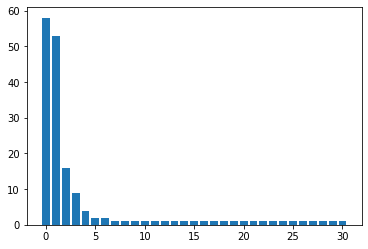

In [6]:
plt.bar(range(0,len(unique_solns_summary)),[x[1] for x in unique_solns_summary])

In [7]:
# percentage in top k solution classes:
k=5
total=0
for i in range(k):
    print(unique_solns_summary[i][1])
    total+=unique_solns_summary[i][1]
print(total/len(methods)*100)
print(len(unique_solns))

58
53
16
9
4
83.33333333333334
31


In [200]:
for k,v in unique_solns.items():
    print(f"******GROUP {i+1}*********")
    print(f"      ***SIZE: {len(unique_solns[k])}****")
    for solution in unique_solns[k]:
        print(solution['studentID'])
        print(solution['code'])
        print("")
    print("")

******GROUP 5*********
      ***SIZE: 16****
student085
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    num_words = 1
    for x in temp_text: 
        if x == ' ':
            num_words += 1
    # num_words: the number of words in the string temp_text
    return num_words

student175
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1
    for i in temp_text:
        if i == ' ':
            num_words += 1
    return num_words

student011
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1
    for x in temp_text:
        if x == ' ':
            num_words = num_words + 1
            
    return num_words

student005
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the str

In [250]:
for k,v in unique_solns.items():
        print(f"******GROUP {i+1}*********")
        print(f"      ***SIZE: {len(unique_solns[k])}****")
        for solution in unique_solns[k]:
            print(solution['studentID'])
            print(solution['code'])
            print("")
        print("")

******GROUP 5*********
      ***SIZE: 16****
student085
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    num_words = 1
    for x in temp_text: 
        if x == ' ':
            num_words += 1
    # num_words: the number of words in the string temp_text
    return num_words

student175
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1
    for i in temp_text:
        if i == ' ':
            num_words += 1
    return num_words

student011
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1
    for x in temp_text:
        if x == ' ':
            num_words = num_words + 1
            
    return num_words

student005
# cell 6 of 14

def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the str

In [262]:
for i in range(len(methods)):
    for j in range(i,len(methods)):
        if(methods[i]['studentID']=='student085' and methods[j]['studentID']=='student080'):
            print(norm_res[i,j])
            print(res[i,j])

0.3282182438192669
0.13725490196078433


### SAVE to JSON

In [59]:
for i,m in enumerate(methods):
    data[m['studentID']]['label']=str(label_med_new[i])
save_json(data,'./comp116/116Q2Soln-NCD-KMeans-24dim-1')

In [261]:
code_080="""def word_count(temp_text):
    '''Return the number of words'''
    # num_words: the number of words in the string temp_text
    num_words = 1;
    for letter in temp_text:
        if(letter == ' '):
            num_words += 1
    
    return num_words
"""
code_085 = """def word_count(temp_text):
    '''Return the number of words'''
    num_words = 1
    for x in temp_text: 
        if x == ' ':
            num_words += 1
    # num_words: the number of words in the string temp_text
    return num_words"""
m=[m for m in methods if m['studentID']=='student080' or m['studentID']=='student085']
s= utils.methodArray_to_SubmissionArray(m,[(m[i]['studentID'],i) for i in range(len(m))] ,mode='tok',lang='python',obf_var=True)
c= NCDClusterer(None, s)
c.checkShuffleSimilarity(b=1000, s=1000,adaptive_windows=True)

Pre-processing done!
calculating row: 0

calculating row: 1



array([[0.       , 0.1372549],
       [0.1372549, 0.       ]])